In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('Allen_Cahn.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u']

# # Use the loaded variables as needed
# print(x.shape)
# print(t.shape)
# print(u.shape)

# X, T = np.meshgrid(x, t)
# # Define custom color levels
# c_levels = np.linspace(np.min(u), np.max(u), 100)

# # Plot the contour
# plt.figure()
# plt.figure(figsize=(15, 5))
# plt.contourf(T, X, u, levels=c_levels, cmap='coolwarm')
# plt.xlabel('t')
# plt.ylabel('x')
# plt.title('Allen-cahn-Equation')
# plt.colorbar()  # Add a colorbar for the contour levels
# plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('X.mat')

X = mat_data['X']

mat_data1 = scipy.io.loadmat('y_pred.mat')

u1 = mat_data1['y_pred']

np.set_printoptions(threshold=np.inf)

X.shape

(20301, 2)

In [4]:
u1 = u1.reshape(101, 201)
u1_new = u1.T
u1_new.shape

(201, 101)

In [5]:
# Load the .mat file
mat_data2 = scipy.io.loadmat('y_true.mat')

u2 = mat_data2['y_true']
print("tani", u2.shape)


tani (20301, 1)


<Figure size 432x288 with 0 Axes>

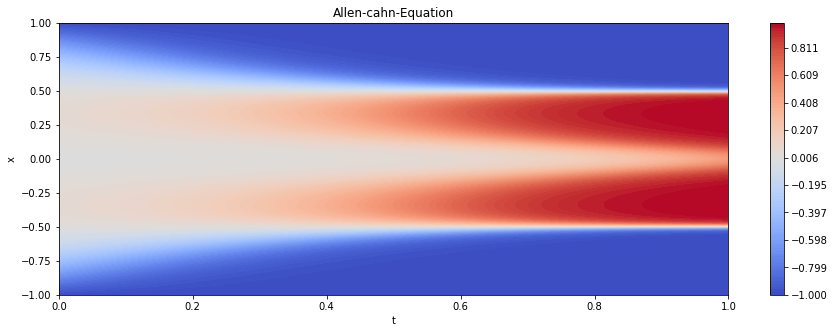

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jul 21 17:01:43 2023',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.  ,  0.  ],
        [-0.99,  0.  ],
        [-0.98,  0.  ],
        [-0.97,  0.  ],
        [-0.96,  0.  ],
        [-0.95,  0.  ],
        [-0.94,  0.  ],
        [-0.93,  0.  ],
        [-0.92,  0.  ],
        [-0.91,  0.  ],
        [-0.9 ,  0.  ],
        [-0.89,  0.  ],
        [-0.88,  0.  ],
        [-0.87,  0.  ],
        [-0.86,  0.  ],
        [-0.85,  0.  ],
        [-0.84,  0.  ],
        [-0.83,  0.  ],
        [-0.82,  0.  ],
        [-0.81,  0.  ],
        [-0.8 ,  0.  ],
        [-0.79,  0.  ],
        [-0.78,  0.  ],
        [-0.77,  0.  ],
        [-0.76,  0.  ],
        [-0.75,  0.  ],
        [-0.74,  0.  ],
        [-0.73,  0.  ],
        [-0.72,  0.  ],
        [-0.71,  0.  ],
        [-0.7 ,  0.  ],
        [-0.69,  0.  ],
        [-0.68,  0.  ],
        [-0.67,  0.  ],
        [-0.66,  0.  ],
        [-0.65,  0.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split


X, T = np.meshgrid(x, t)

# # Define custom color levels
c_levels = np.linspace(np.min(u1_new),  np.max(u1_new), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u1_new.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Allen-cahn-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()
mat_data

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
# Define the coRNNCell
class coRNNCell(nn.Module):
    def __init__(self, n_inp, n_hid, dt, gamma, epsilon):
        super(coRNNCell, self).__init__()
        self.dt = dt
        self.gamma = gamma
        self.epsilon = epsilon
        self.i2h = nn.Linear(n_inp + n_hid + n_hid, n_hid)

    def forward(self, x, hy, hz):
        hz = hz + self.dt * (torch.tanh(self.i2h(torch.cat((x, hz, hy), 1)))
                             - self.gamma * hy - self.epsilon * hz)
        hy = hy + self.dt * hz

        return hy, hz

# Define the coRNN model
class coRNN(nn.Module):
    def __init__(self, n_inp, n_hid, n_out, dt, gamma, epsilon):
        super(coRNN, self).__init__()
        self.n_hid = n_hid
        self.cell = coRNNCell(n_inp, n_hid, dt, gamma, epsilon)
        self.readout = nn.Linear(n_hid, n_out)

    def forward(self, x):
        hy = torch.zeros(x.size(1), self.n_hid)
        hz = torch.zeros(x.size(1), self.n_hid)

        for t in range(x.size(0)):
            hy, hz = self.cell(x[t], hy, hz)
        output = self.readout(hy)

        return output


In [8]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [9]:
# Toy problem data
input_size = 201  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 201
sequence_length = 80  # number of sequences/ number of rows
batch_size = 1
num_epochs = 20000

In [10]:
u1 = u1_new

In [11]:
input_data = u1_new[:, 0:80]
target_data = u1_new[:, 1:81]

test_data = u1_new[:, 80]
#test_target = u1[:, 81:101]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (201,)
input data shape (201, 80)
Target data shape (201, 80)


In [12]:
# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 80, 201])
Target tensor shape torch.Size([1, 80, 201])


In [13]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()


In [14]:
# Create coRNN instance
cornn = coRNN(input_size, hidden_size, output_size, dt=0.1, gamma=1.0, epsilon=0.01)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cornn.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    output = cornn(input_tensor)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')




Epoch: 10/20000, Loss: 0.42198160
Epoch: 20/20000, Loss: 0.40791842
Epoch: 30/20000, Loss: 0.39426807
Epoch: 40/20000, Loss: 0.38114074
Epoch: 50/20000, Loss: 0.36854243
Epoch: 60/20000, Loss: 0.35645503
Epoch: 70/20000, Loss: 0.34485063
Epoch: 80/20000, Loss: 0.33370048
Epoch: 90/20000, Loss: 0.32297829
Epoch: 100/20000, Loss: 0.31266090
Epoch: 110/20000, Loss: 0.30272791
Epoch: 120/20000, Loss: 0.29316103
Epoch: 130/20000, Loss: 0.28394392
Epoch: 140/20000, Loss: 0.27506155
Epoch: 150/20000, Loss: 0.26650006
Epoch: 160/20000, Loss: 0.25824642
Epoch: 170/20000, Loss: 0.25028861
Epoch: 180/20000, Loss: 0.24261504
Epoch: 190/20000, Loss: 0.23521499
Epoch: 200/20000, Loss: 0.22807810
Epoch: 210/20000, Loss: 0.22119458
Epoch: 220/20000, Loss: 0.21455507
Epoch: 230/20000, Loss: 0.20815067
Epoch: 240/20000, Loss: 0.20197287
Epoch: 250/20000, Loss: 0.19601355
Epoch: 260/20000, Loss: 0.19026491
Epoch: 270/20000, Loss: 0.18471950
Epoch: 280/20000, Loss: 0.17937018
Epoch: 290/20000, Loss: 0.174

/data/localhome/tkapoor/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 80, 201])) that is different to the input size (torch.Size([80, 201])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 310/20000, Loss: 0.16443159
Epoch: 320/20000, Loss: 0.15980081
Epoch: 330/20000, Loss: 0.15533449
Epoch: 340/20000, Loss: 0.15102704
Epoch: 350/20000, Loss: 0.14687307
Epoch: 360/20000, Loss: 0.14286737
Epoch: 370/20000, Loss: 0.13900495
Epoch: 380/20000, Loss: 0.13528100
Epoch: 390/20000, Loss: 0.13169084
Epoch: 400/20000, Loss: 0.12823002
Epoch: 410/20000, Loss: 0.12489422
Epoch: 420/20000, Loss: 0.12167923
Epoch: 430/20000, Loss: 0.11858106
Epoch: 440/20000, Loss: 0.11559581
Epoch: 450/20000, Loss: 0.11271971
Epoch: 460/20000, Loss: 0.10994914
Epoch: 470/20000, Loss: 0.10728056
Epoch: 480/20000, Loss: 0.10471058
Epoch: 490/20000, Loss: 0.10223591
Epoch: 500/20000, Loss: 0.09985338
Epoch: 510/20000, Loss: 0.09755988
Epoch: 520/20000, Loss: 0.09535244
Epoch: 530/20000, Loss: 0.09322812
Epoch: 540/20000, Loss: 0.09118416
Epoch: 550/20000, Loss: 0.08921776
Epoch: 560/20000, Loss: 0.08732627
Epoch: 570/20000, Loss: 0.08550702
Epoch: 580/20000, Loss: 0.08375744
Epoch: 590/20000, Lo

Epoch: 2640/20000, Loss: 0.00199928
Epoch: 2650/20000, Loss: 0.00197537
Epoch: 2660/20000, Loss: 0.00195179
Epoch: 2670/20000, Loss: 0.00192854
Epoch: 2680/20000, Loss: 0.00190560
Epoch: 2690/20000, Loss: 0.00188298
Epoch: 2700/20000, Loss: 0.00186067
Epoch: 2710/20000, Loss: 0.00183866
Epoch: 2720/20000, Loss: 0.00181695
Epoch: 2730/20000, Loss: 0.00179553
Epoch: 2740/20000, Loss: 0.00177440
Epoch: 2750/20000, Loss: 0.00175355
Epoch: 2760/20000, Loss: 0.00173297
Epoch: 2770/20000, Loss: 0.00171267
Epoch: 2780/20000, Loss: 0.00169264
Epoch: 2790/20000, Loss: 0.00167286
Epoch: 2800/20000, Loss: 0.00165335
Epoch: 2810/20000, Loss: 0.00163409
Epoch: 2820/20000, Loss: 0.00161509
Epoch: 2830/20000, Loss: 0.00159632
Epoch: 2840/20000, Loss: 0.00157781
Epoch: 2850/20000, Loss: 0.00155952
Epoch: 2860/20000, Loss: 0.00154148
Epoch: 2870/20000, Loss: 0.00152366
Epoch: 2880/20000, Loss: 0.00150607
Epoch: 2890/20000, Loss: 0.00148870
Epoch: 2900/20000, Loss: 0.00147156
Epoch: 2910/20000, Loss: 0.0

Epoch: 4960/20000, Loss: 0.00015004
Epoch: 4970/20000, Loss: 0.00014841
Epoch: 4980/20000, Loss: 0.00014680
Epoch: 4990/20000, Loss: 0.00014520
Epoch: 5000/20000, Loss: 0.00014362
Epoch: 5010/20000, Loss: 0.00014206
Epoch: 5020/20000, Loss: 0.00014051
Epoch: 5030/20000, Loss: 0.00013898
Epoch: 5040/20000, Loss: 0.00013746
Epoch: 5050/20000, Loss: 0.00013597
Epoch: 5060/20000, Loss: 0.00013449
Epoch: 5070/20000, Loss: 0.00013302
Epoch: 5080/20000, Loss: 0.00013157
Epoch: 5090/20000, Loss: 0.00013013
Epoch: 5100/20000, Loss: 0.00012871
Epoch: 5110/20000, Loss: 0.00012731
Epoch: 5120/20000, Loss: 0.00012592
Epoch: 5130/20000, Loss: 0.00012455
Epoch: 5140/20000, Loss: 0.00012319
Epoch: 5150/20000, Loss: 0.00012184
Epoch: 5160/20000, Loss: 0.00012051
Epoch: 5170/20000, Loss: 0.00011919
Epoch: 5180/20000, Loss: 0.00011789
Epoch: 5190/20000, Loss: 0.00011660
Epoch: 5200/20000, Loss: 0.00011532
Epoch: 5210/20000, Loss: 0.00011406
Epoch: 5220/20000, Loss: 0.00011281
Epoch: 5230/20000, Loss: 0.0

Epoch: 7290/20000, Loss: 0.00001103
Epoch: 7300/20000, Loss: 0.00001091
Epoch: 7310/20000, Loss: 0.00001079
Epoch: 7320/20000, Loss: 0.00001067
Epoch: 7330/20000, Loss: 0.00001055
Epoch: 7340/20000, Loss: 0.00001044
Epoch: 7350/20000, Loss: 0.00001032
Epoch: 7360/20000, Loss: 0.00001021
Epoch: 7370/20000, Loss: 0.00001010
Epoch: 7380/20000, Loss: 0.00000999
Epoch: 7390/20000, Loss: 0.00000988
Epoch: 7400/20000, Loss: 0.00000977
Epoch: 7410/20000, Loss: 0.00000966
Epoch: 7420/20000, Loss: 0.00000956
Epoch: 7430/20000, Loss: 0.00000945
Epoch: 7440/20000, Loss: 0.00000935
Epoch: 7450/20000, Loss: 0.00000925
Epoch: 7460/20000, Loss: 0.00000915
Epoch: 7470/20000, Loss: 0.00000905
Epoch: 7480/20000, Loss: 0.00000895
Epoch: 7490/20000, Loss: 0.00000885
Epoch: 7500/20000, Loss: 0.00000876
Epoch: 7510/20000, Loss: 0.00000866
Epoch: 7520/20000, Loss: 0.00000857
Epoch: 7530/20000, Loss: 0.00000848
Epoch: 7540/20000, Loss: 0.00000839
Epoch: 7550/20000, Loss: 0.00000830
Epoch: 7560/20000, Loss: 0.0

Epoch: 9600/20000, Loss: 0.00000111
Epoch: 9610/20000, Loss: 0.00000110
Epoch: 9620/20000, Loss: 0.00000109
Epoch: 9630/20000, Loss: 0.00000108
Epoch: 9640/20000, Loss: 0.00000107
Epoch: 9650/20000, Loss: 0.00000107
Epoch: 9660/20000, Loss: 0.00000106
Epoch: 9670/20000, Loss: 0.00000106
Epoch: 9680/20000, Loss: 0.00000104
Epoch: 9690/20000, Loss: 0.00000103
Epoch: 9700/20000, Loss: 0.00000102
Epoch: 9710/20000, Loss: 0.00000101
Epoch: 9720/20000, Loss: 0.00000100
Epoch: 9730/20000, Loss: 0.00000099
Epoch: 9740/20000, Loss: 0.00000098
Epoch: 9750/20000, Loss: 0.00000098
Epoch: 9760/20000, Loss: 0.00000097
Epoch: 9770/20000, Loss: 0.00000096
Epoch: 9780/20000, Loss: 0.00000095
Epoch: 9790/20000, Loss: 0.00000094
Epoch: 9800/20000, Loss: 0.00000094
Epoch: 9810/20000, Loss: 0.00000093
Epoch: 9820/20000, Loss: 0.00000092
Epoch: 9830/20000, Loss: 0.00000091
Epoch: 9840/20000, Loss: 0.00000091
Epoch: 9850/20000, Loss: 0.00000090
Epoch: 9860/20000, Loss: 0.00000089
Epoch: 9870/20000, Loss: 0.0

Epoch: 11840/20000, Loss: 0.00000022
Epoch: 11850/20000, Loss: 0.00000022
Epoch: 11860/20000, Loss: 0.00000021
Epoch: 11870/20000, Loss: 0.00000021
Epoch: 11880/20000, Loss: 0.00000021
Epoch: 11890/20000, Loss: 0.00000021
Epoch: 11900/20000, Loss: 0.00000021
Epoch: 11910/20000, Loss: 0.00000021
Epoch: 11920/20000, Loss: 0.00000021
Epoch: 11930/20000, Loss: 0.00000020
Epoch: 11940/20000, Loss: 0.00000020
Epoch: 11950/20000, Loss: 0.00000020
Epoch: 11960/20000, Loss: 0.00000020
Epoch: 11970/20000, Loss: 0.00000031
Epoch: 11980/20000, Loss: 0.00000020
Epoch: 11990/20000, Loss: 0.00000021
Epoch: 12000/20000, Loss: 0.00000020
Epoch: 12010/20000, Loss: 0.00000020
Epoch: 12020/20000, Loss: 0.00000019
Epoch: 12030/20000, Loss: 0.00000019
Epoch: 12040/20000, Loss: 0.00000019
Epoch: 12050/20000, Loss: 0.00000019
Epoch: 12060/20000, Loss: 0.00000019
Epoch: 12070/20000, Loss: 0.00000019
Epoch: 12080/20000, Loss: 0.00000019
Epoch: 12090/20000, Loss: 0.00000019
Epoch: 12100/20000, Loss: 0.00000018
E

Epoch: 14110/20000, Loss: 0.00000006
Epoch: 14120/20000, Loss: 0.00000006
Epoch: 14130/20000, Loss: 0.00000006
Epoch: 14140/20000, Loss: 0.00000006
Epoch: 14150/20000, Loss: 0.00000006
Epoch: 14160/20000, Loss: 0.00000013
Epoch: 14170/20000, Loss: 0.00000011
Epoch: 14180/20000, Loss: 0.00000006
Epoch: 14190/20000, Loss: 0.00000007
Epoch: 14200/20000, Loss: 0.00000006
Epoch: 14210/20000, Loss: 0.00000006
Epoch: 14220/20000, Loss: 0.00000006
Epoch: 14230/20000, Loss: 0.00000006
Epoch: 14240/20000, Loss: 0.00000006
Epoch: 14250/20000, Loss: 0.00000006
Epoch: 14260/20000, Loss: 0.00000006
Epoch: 14270/20000, Loss: 0.00000006
Epoch: 14280/20000, Loss: 0.00000006
Epoch: 14290/20000, Loss: 0.00000006
Epoch: 14300/20000, Loss: 0.00000006
Epoch: 14310/20000, Loss: 0.00000006
Epoch: 14320/20000, Loss: 0.00000006
Epoch: 14330/20000, Loss: 0.00000006
Epoch: 14340/20000, Loss: 0.00000006
Epoch: 14350/20000, Loss: 0.00000006
Epoch: 14360/20000, Loss: 0.00000006
Epoch: 14370/20000, Loss: 0.00000006
E

Epoch: 16450/20000, Loss: 0.00000003
Epoch: 16460/20000, Loss: 0.00000003
Epoch: 16470/20000, Loss: 0.00000003
Epoch: 16480/20000, Loss: 0.00000003
Epoch: 16490/20000, Loss: 0.00000003
Epoch: 16500/20000, Loss: 0.00000003
Epoch: 16510/20000, Loss: 0.00000003
Epoch: 16520/20000, Loss: 0.00000003
Epoch: 16530/20000, Loss: 0.00000002
Epoch: 16540/20000, Loss: 0.00000002
Epoch: 16550/20000, Loss: 0.00000002
Epoch: 16560/20000, Loss: 0.00000002
Epoch: 16570/20000, Loss: 0.00000002
Epoch: 16580/20000, Loss: 0.00000002
Epoch: 16590/20000, Loss: 0.00000002
Epoch: 16600/20000, Loss: 0.00000002
Epoch: 16610/20000, Loss: 0.00000002
Epoch: 16620/20000, Loss: 0.00000002
Epoch: 16630/20000, Loss: 0.00000002
Epoch: 16640/20000, Loss: 0.00000002
Epoch: 16650/20000, Loss: 0.00000002
Epoch: 16660/20000, Loss: 0.00000003
Epoch: 16670/20000, Loss: 0.00000017
Epoch: 16680/20000, Loss: 0.00000005
Epoch: 16690/20000, Loss: 0.00000003
Epoch: 16700/20000, Loss: 0.00000003
Epoch: 16710/20000, Loss: 0.00000002
E

Epoch: 18740/20000, Loss: 0.00000002
Epoch: 18750/20000, Loss: 0.00000002
Epoch: 18760/20000, Loss: 0.00000001
Epoch: 18770/20000, Loss: 0.00000001
Epoch: 18780/20000, Loss: 0.00000001
Epoch: 18790/20000, Loss: 0.00000001
Epoch: 18800/20000, Loss: 0.00000001
Epoch: 18810/20000, Loss: 0.00000001
Epoch: 18820/20000, Loss: 0.00000001
Epoch: 18830/20000, Loss: 0.00000001
Epoch: 18840/20000, Loss: 0.00000001
Epoch: 18850/20000, Loss: 0.00000001
Epoch: 18860/20000, Loss: 0.00000001
Epoch: 18870/20000, Loss: 0.00000001
Epoch: 18880/20000, Loss: 0.00000001
Epoch: 18890/20000, Loss: 0.00000001
Epoch: 18900/20000, Loss: 0.00000001
Epoch: 18910/20000, Loss: 0.00000008
Epoch: 18920/20000, Loss: 0.00000007
Epoch: 18930/20000, Loss: 0.00000002
Epoch: 18940/20000, Loss: 0.00000002
Epoch: 18950/20000, Loss: 0.00000002
Epoch: 18960/20000, Loss: 0.00000001
Epoch: 18970/20000, Loss: 0.00000001
Epoch: 18980/20000, Loss: 0.00000001
Epoch: 18990/20000, Loss: 0.00000001
Epoch: 19000/20000, Loss: 0.00000001
E

In [15]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 201).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 201])
torch.Size([1, 20, 201])


In [16]:
with torch.no_grad():
    prediction = cornn(test_tensor)
    prediction = prediction.view(1, 1, 201).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        prediction = cornn(prediction)
        prediction = prediction.view(1, 1, 201).float()
        prediction_tensor[:, i+1, :] = prediction

### errors

In [17]:
### L2 norm error

In [18]:
# # exact
# u_test = u
# u_test_full = u_test[80:100, :]
# prediction_tensor = torch.squeeze(prediction_tensor)

In [19]:

# k1 = (prediction_tensor - u_test_full)**2
# u_test_full_tensor = torch.tensor(u_test_full**2)
# prediction_tensor.shape

In [20]:
# # Compute the relative L2 error norm (generalization error)
# relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

# print("Relative Error Test: ", relative_error_test.item(), "%")

### max absolute error

In [21]:
# # R_abs = torch.max(prediction_tensor-u_test_full)
# print(R_abs)

### Explained variance score

In [22]:
# import torch

# a = prediction_tensor
# b = u_test_full
# # Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# # Make sure 'a' and 'b' are PyTorch tensors
# b = torch.tensor(b)
# # Calculate the mean of 'b'
# mean_b = torch.mean(b)

# # Calculate the Explained Variance Score
# numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
# denominator = torch.var(b)    # Variance of 'b'
# evs = 1 - numerator / denominator

# print("Explained Variance Score:", evs.item())


### mean absolute error

In [23]:
# R_mean = torch.mean(torch.abs(prediction_tensor - u_test_full))
# print(R_mean)

In [24]:
print(u.shape)

(101, 201)


In [25]:
# Exact Solution

u_test = u
u_test_full = u_test[80:100, :]

In [26]:
prediction.shape

torch.Size([1, 1, 201])

In [27]:
u_test_full.shape

(20, 201)

### L2 norm

In [28]:
# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
u_test_full_tensor.shape

torch.Size([20, 201])

In [29]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.005146909499120122 %


### Max absolute error

In [30]:
R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))
print(R_abs)

tensor(0.3201, dtype=torch.float64)


### Explained variance score

In [31]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
a = torch.tensor(a)
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

Explained Variance Score: 0.9954673939400089


/tmp/ipykernel_36381/2104891356.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a)


### Mean absolute error

In [32]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")

Relative Error Test:  tensor(0.0356, dtype=torch.float64) %


### snapshots

In [33]:
prediction_tensor = torch.squeeze(prediction_tensor)
prediction_tensor.shape

torch.Size([20, 201])

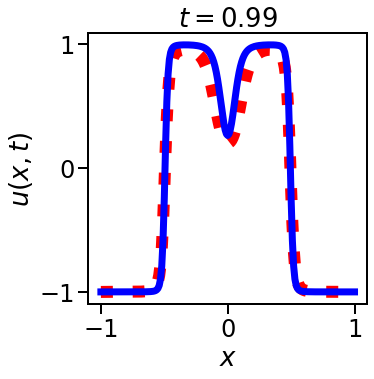

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)

final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u[-2, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.99}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('coRNN_0.99_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


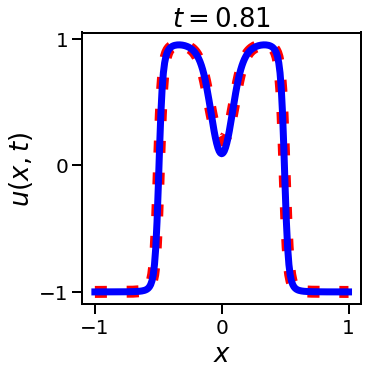

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-20, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u[-20, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.81}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('coRNN_0.81_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


### 80-20

In [36]:
conc_u = torch.squeeze(input_tensor)
prediction_tensor = torch.squeeze(prediction_tensor)
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)
t1 = np.linspace(0, 1 , 100)

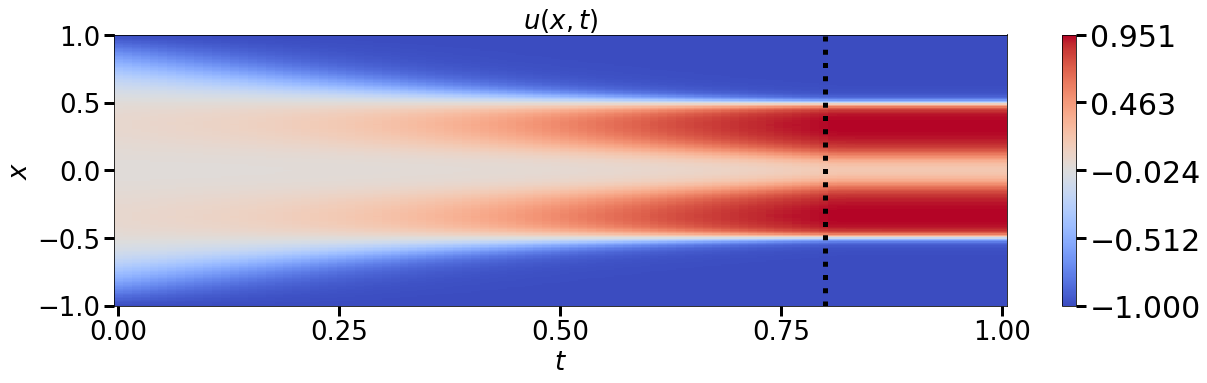

In [37]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-1, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='coolwarm')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_coRNN_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
